
# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [2]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-10-02 01:10:57--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-10-02 01:10:58--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [49]:
Grupo_Paises = data.groupby('Country').agg({
    'Quantity': 'sum',
}).sort_values(by='Quantity', ascending=False)

print("Agrupacion por País")
print(Grupo_Paises)

top_5_cantidad = Grupo_Paises['Quantity'].head(5)

Agrupacion por País
                      Quantity
Country                       
United Kingdom         4263829
Netherlands             200128
EIRE                    142637
Germany                 117448
France                  110480
Australia                83653
Sweden                   35637
Switzerland              30325
Spain                    26824
Japan                    25218
Belgium                  23152
Norway                   19247
Portugal                 16180
Finland                  10666
Channel Islands           9479
Denmark                   8188
Italy                     7999
Cyprus                    6317
Singapore                 5234
Austria                   4827
Hong Kong                 4769
Israel                    4353
Poland                    3653
Unspecified               3300
Canada                    2763
Iceland                   2458
Greece                    1556
USA                       1034
United Arab Emirates       982
Malta              

In [51]:
Grupo_Paises = data.groupby('Country').agg({
    'UnitPrice': 'mean',
}).sort_values(by='UnitPrice', ascending=False)

print("Agrupacion por País")
print(Grupo_Paises)

top_5_cantidad = Grupo_Paises['UnitPrice'].head(5)

Agrupacion por País
                       UnitPrice
Country                         
Singapore             109.645808
Hong Kong              42.505208
Portugal                8.582976
Cyprus                  6.302363
Canada                  6.030331
Norway                  6.012026
EIRE                    5.911077
Finland                 5.448705
Lebanon                 5.387556
Malta                   5.244173
France                  5.028864
Spain                   4.987544
Channel Islands         4.932124
Greece                  4.885548
Italy                   4.831121
European Community      4.820492
Bahrain                 4.556316
United Kingdom          4.532422
Brazil                  4.456250
RSA                     4.277586
Austria                 4.243192
Poland                  4.170880
Germany                 3.966930
Sweden                  3.910887
Belgium                 3.644335
Israel                  3.633131
Switzerland             3.403442
United Arab Emirates   

/tmp/ipython-input-1139830030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cantidad.index, y=top_5_cantidad.values, palette="viridis")


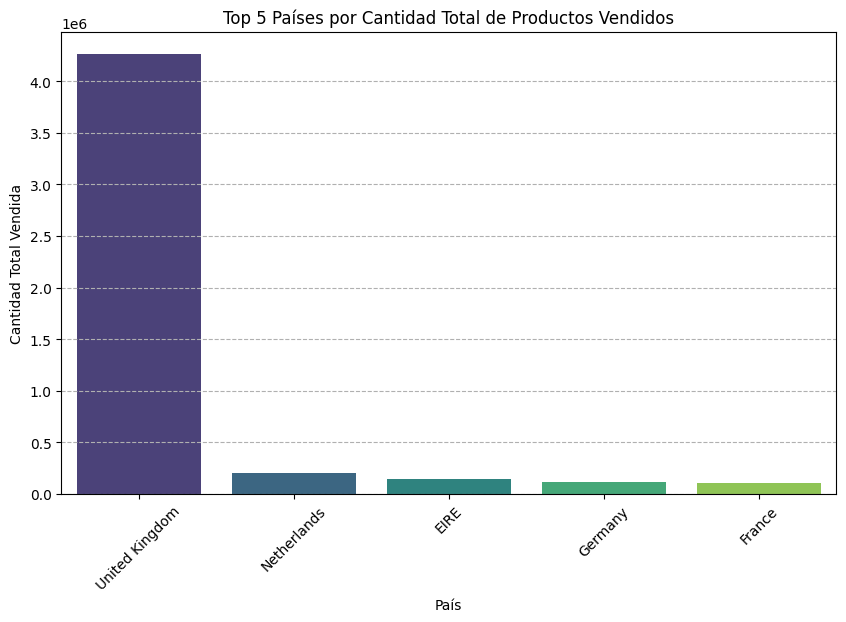

In [54]:
top_5_cantidad = df_country_agg['Quantity'].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cantidad.index, y=top_5_cantidad.values, palette="viridis")
plt.title('Top 5 Países por Cantidad Total de Productos Vendidos')
plt.xlabel('País')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [71]:
data.groupby("StockCode")["Quantity"].value_counts()

StockCode     Quantity
10002         1           20
              12          13
              2           11
              5            4
              6            4
                          ..
gift_0001_30  1            7
              30           1
gift_0001_40  1            3
gift_0001_50  1            4
m             1            1
Name: count, Length: 45280, dtype: int64

/tmp/ipython-input-866245135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stock.values, y=top_10_stock.index, palette="mako")


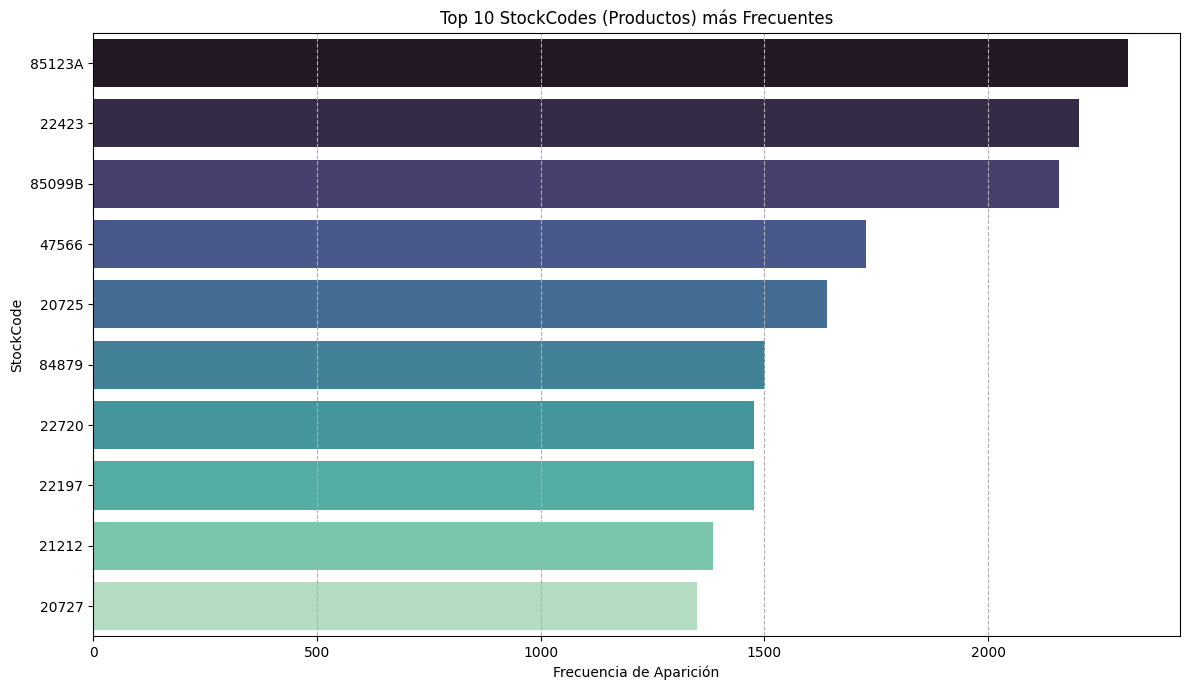

In [72]:
top_10_stock = stock_counts.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_stock.values, y=top_10_stock.index, palette="mako")
plt.title('Top 10 Productos más Frecuentes')
plt.xlabel('Frecuencia de Aparición')
plt.ylabel('StockCode')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [74]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [79]:
invoices_total = data.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

In [80]:
Factura_promedio = invoices_total['TotalPrice'].mean()

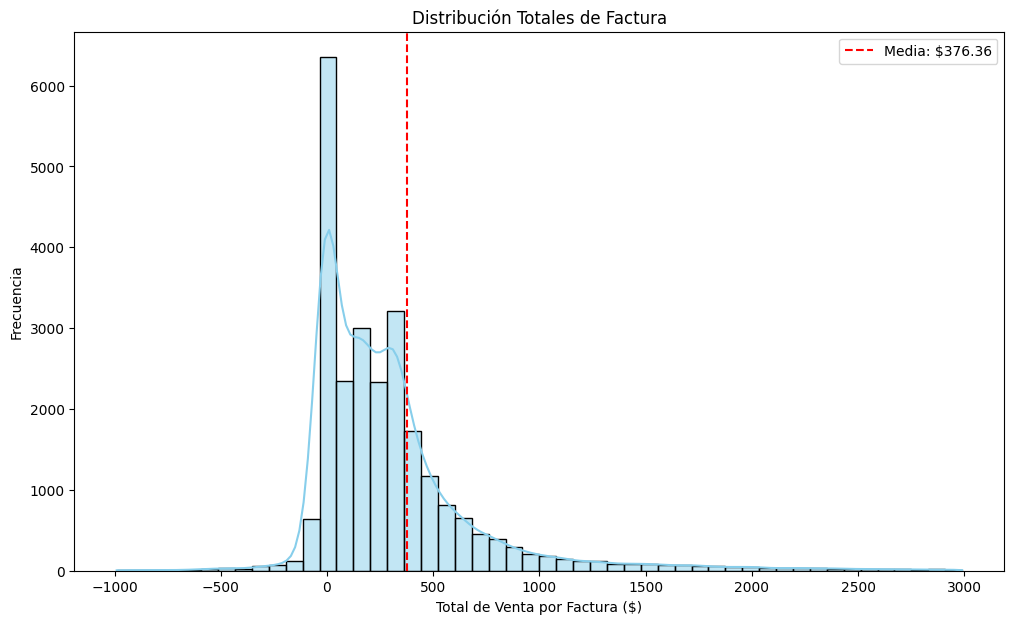

In [93]:
plt.figure(figsize=(12, 7))
sns.histplot(invoices_total[(invoices_total['TotalPrice'] < 3000) & (invoices_total['TotalPrice'] > -1000)]['TotalPrice'], bins=50, kde=True, color='skyblue')
plt.axvline(Factura_promedio, color='red', linestyle='--', label=f'Media: ${Factura_promedio:,.2f}')
plt.title('Distribución Totales de Factura')
plt.xlabel('Total de Venta por Factura ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

/tmp/ipython-input-2717064829.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Ventas_Diarias = data.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().fillna(0).reset_index()


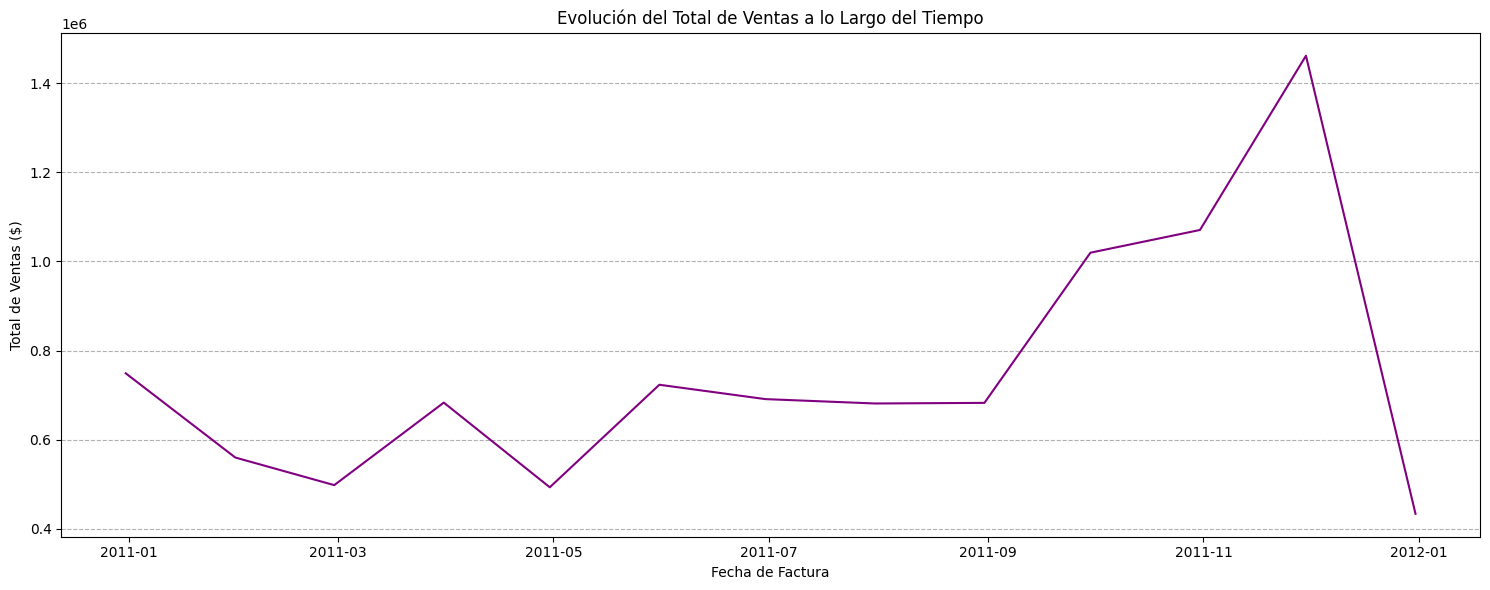

In [100]:
Ventas_Diarias = data.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
Ventas_Diarias = data.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().fillna(0).reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=Ventas_Diarias, color='purple')
plt.title('Evolución del Total de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha de Factura')
plt.ylabel('Total de Ventas ($)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

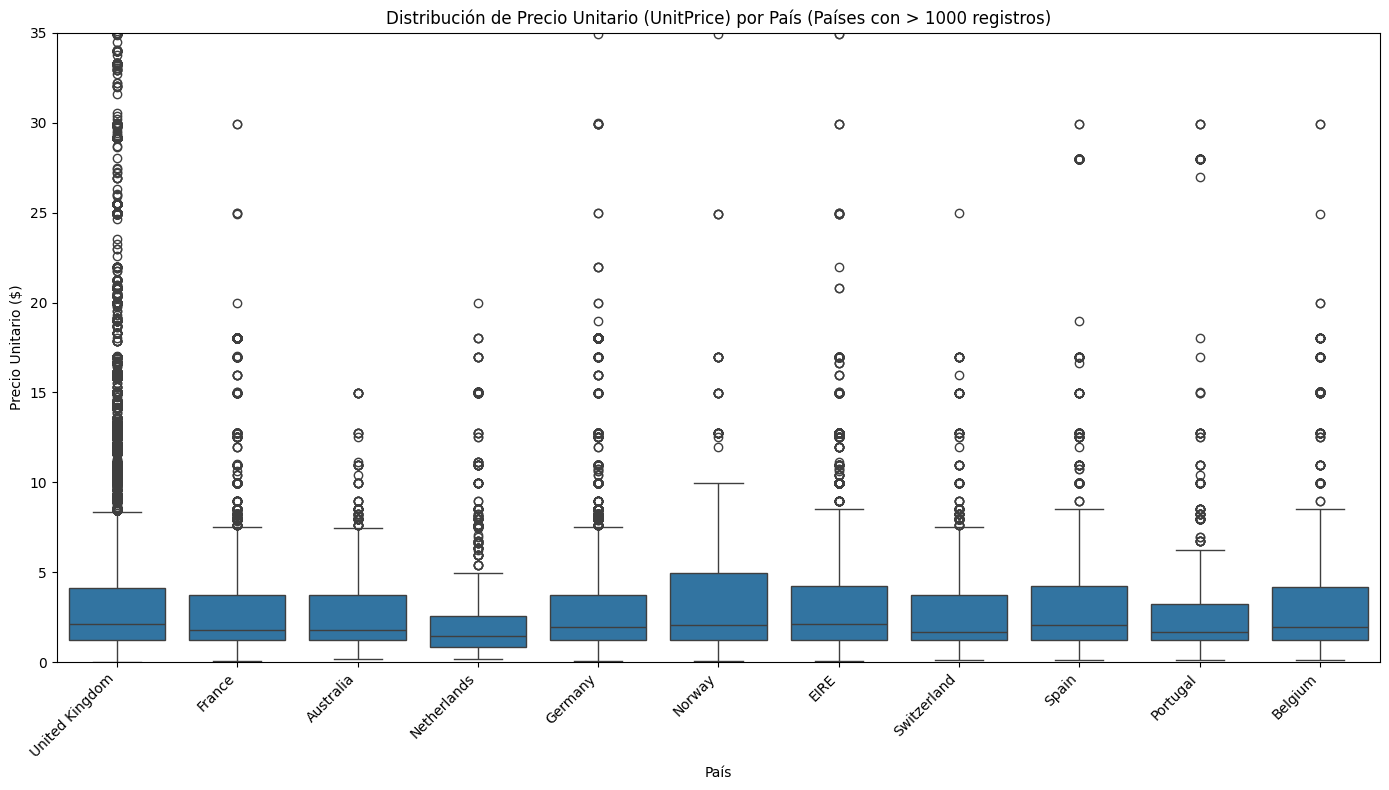

In [103]:
df_clean_price = data[data['UnitPrice'] > 0]

country_counts = df_clean_price['Country'].value_counts()
countries_to_keep = country_counts[country_counts > 1000].index
df_filtered_country = df_clean_price[df_clean_price['Country'].isin(countries_to_keep)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='UnitPrice', data=df_filtered_country)
plt.title('Distribución de Precio Unitario (UnitPrice) por País (Países con > 1000 registros)')
plt.xlabel('País')
plt.ylabel('Precio Unitario ($)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 35)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

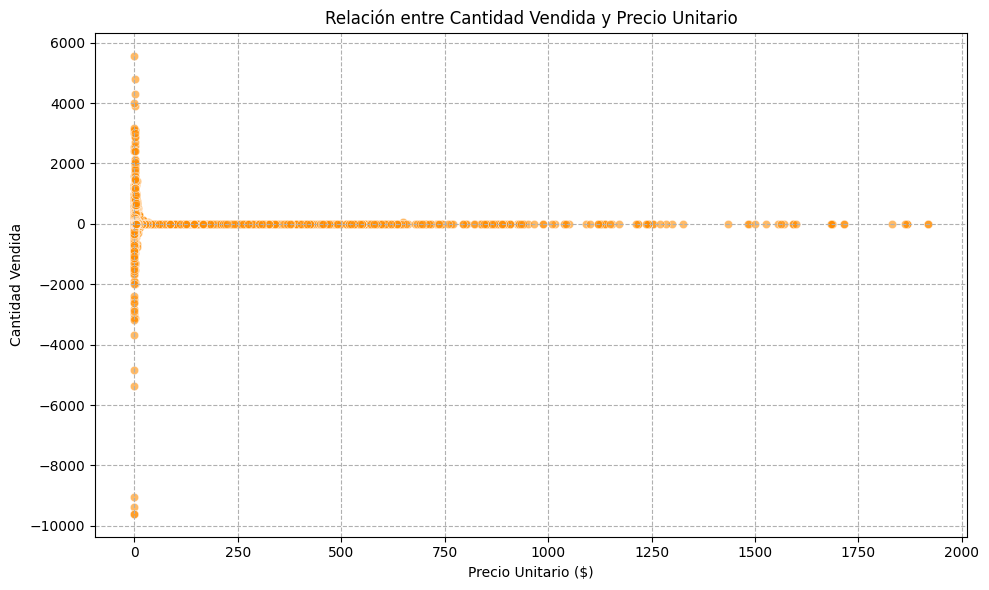

In [107]:
Filtro = data[(data['Quantity'] < 10000) & (data['UnitPrice'] < 2000) & (data['Quantity'] > -10000) & (data['UnitPrice'] > -2000)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=Filtro, alpha=0.6, color='darkorange')
plt.title('Relación entre Cantidad Vendida y Precio Unitario')
plt.xlabel('Precio Unitario ($)')
plt.ylabel('Cantidad Vendida')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

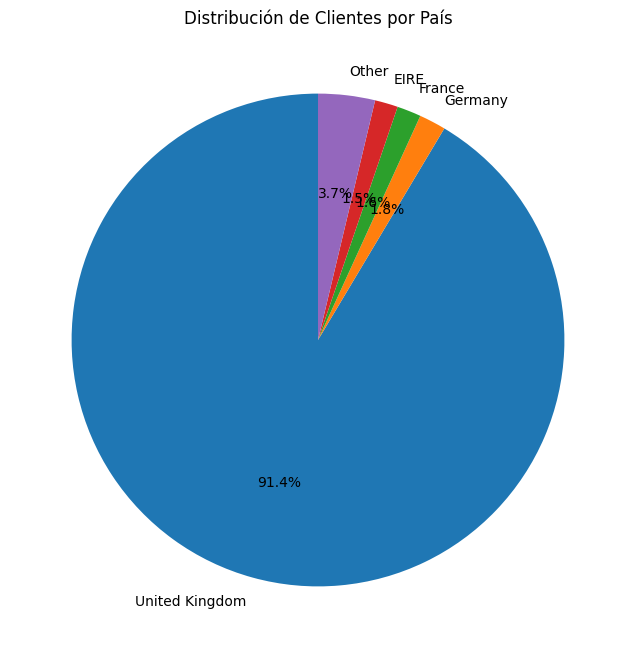

In [112]:
Clientes_Paises = data["Country"].value_counts()
min_pct = 0.01
mask = Clientes_Paises / Clientes_Paises.sum() >= min_pct
filtered_counts = Clientes_Paises[mask]
other = Clientes_Paises[~mask].sum()
if other > 0:
    filtered_counts["Other"] = other
plt.figure(figsize=(8,8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Clientes por País")
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

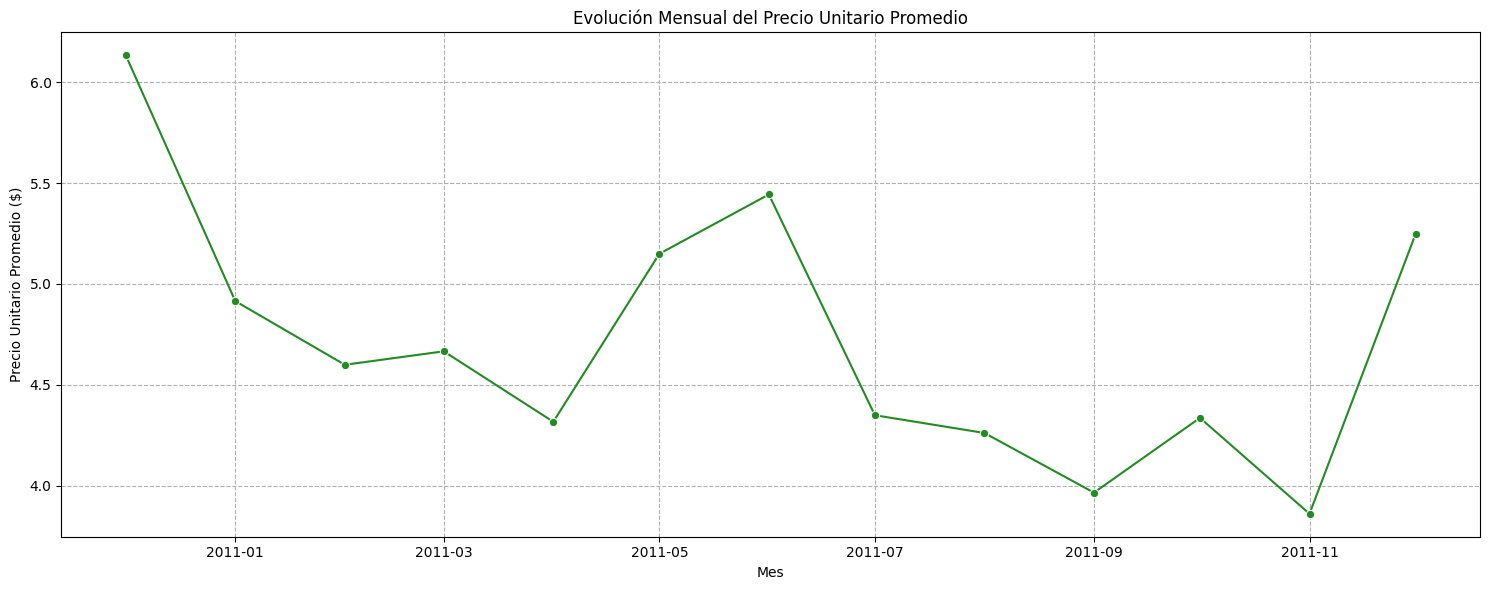

In [114]:
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

monthly_avg_price = data.groupby('InvoiceMonth')['UnitPrice'].mean().reset_index()

monthly_avg_price['InvoiceMonth'] = monthly_avg_price['InvoiceMonth'].dt.to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x='InvoiceMonth', y='UnitPrice', data=monthly_avg_price, marker='o', color='forestgreen')
plt.title('Evolución Mensual del Precio Unitario Promedio')
plt.xlabel('Mes')
plt.ylabel('Precio Unitario Promedio ($)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

/tmp/ipython-input-2693739519.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_productos.index, y=top_5_productos.values, palette="rocket")


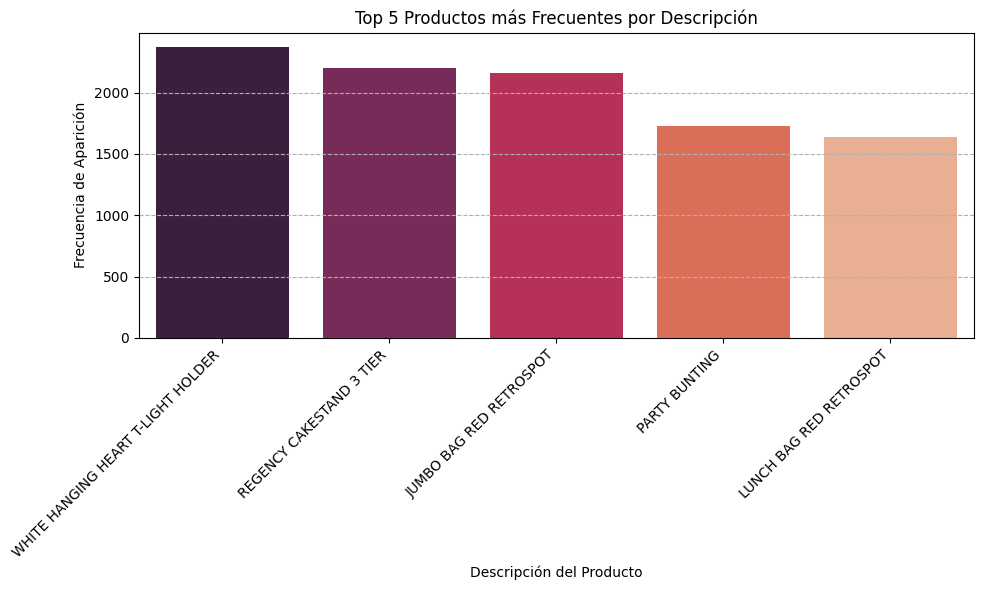

In [115]:
description_counts = data['Description'].value_counts()

top_5_productos = description_counts.head(5)

plt.figure(figsize=(10, 6))
# Gráfico de barras vertical
sns.barplot(x=top_5_productos.index, y=top_5_productos.values, palette="rocket")
plt.title('Top 5 Productos más Frecuentes por Descripción')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia de Aparición')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.